## DAY 6 - Model Comparison

### Library Imports, Loading and Cleaning Dataset

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# loading the titanic dataset
dataset = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv" 
df = pd.read_csv(dataset)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin']) #dropping unnecessary columns 

df['Sex'] = df['Sex'].map({'male':0, 'female':1}) #mapping sex into 0 and 1

df['Embarked'] = df['Embarked'].map({'S':0, 'C':1, 'Q':2}) #mapping emabrked into 0,1,2

df['Age'] = df['Age'].fillna(df['Age'].median()) #filling up empty age fields with median 

df = df.dropna(subset=['Embarked']) #dropping rows with missing embarked values

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,0.0
1,2,1,1,1,38.0,1,0,71.2833,1.0
2,3,1,3,1,26.0,0,0,7.9250,0.0
3,4,1,1,1,35.0,1,0,53.1000,0.0
4,5,0,3,0,35.0,0,0,8.0500,0.0


In [5]:
df.isna().sum() #checking if there is still any fields with NAN value

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

### Feature Mapping and Dataset Splitting

In [6]:
# mapping feature and target variables
x = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = df['Survived']

In [7]:
# splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=69
)

### Train and Test Multiple Models

In [17]:
# defining all models in a dictionary
model = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=69),
    "Random Forest": RandomForestClassifier(random_state=69),
    "K Neighbors": KNeighborsClassifier(),
    "SVM (RBF)": SVC()
}

In [10]:
#training all the models on same split using a loop
results = {}

for name, model in model.items():
    model.fit(x_train, y_train) #training on train data 
    y_pred = model.predict(x_test) #making predictions on test data

    acc = accuracy_score(y_test, y_pred) #getting accuracy of the model
    results[name] = acc

    print(f"{name} accuracy: {acc:.4f}")

Logistic Regression accuracy: 0.8483
Decision Tree accuracy: 0.7640
Random Forest accuracy: 0.8483
K Neighbors accuracy: 0.7809
SVM (RBF) accuracy: 0.7191


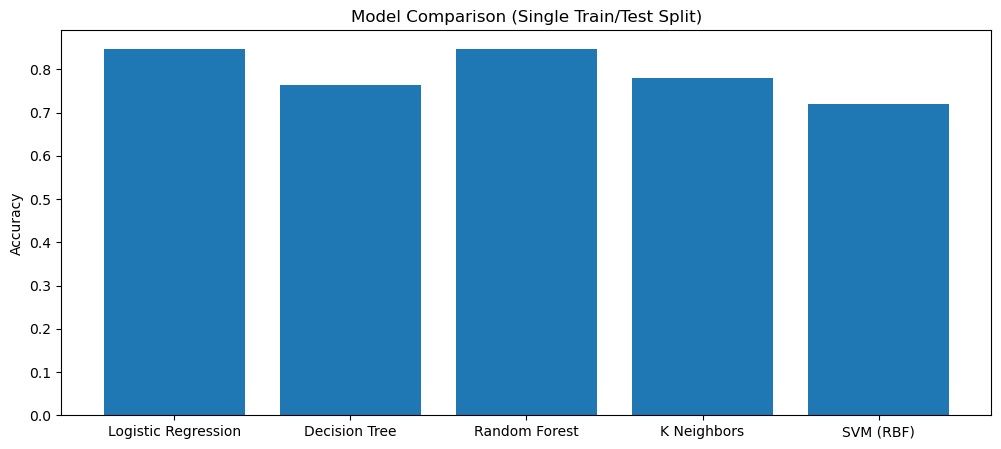

In [13]:
#visualizing the comparison
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(12, 5))
plt.bar(model_names, accuracies)
plt.xticks(rotation=0)
plt.ylabel("Accuracy")
plt.title("Model Comparison (Single Train/Test Split)")
plt.show()

### Cross Validation (K-Fold)

In [ ]:
from sklearn.model_selection import cross_val_score

cv_results = {}

for name, model in model.items():
    scores = cross_val_score(model, x, y, cv=5, scoring='accuracy') 
    cv_results[name] = scores

    print(f"{name}:")
    print(f"  Scores: {scores}")
    print(f"  Mean accuracy: {scores.mean():.4f}")
    print(f"  Std dev: {scores.std():.4f}")
    print("-" * 40)

Logistic Regression:
  Scores: [0.79213483 0.79213483 0.78651685 0.76966292 0.82485876]
  Mean accuracy: 0.7931
  Std dev: 0.0179
----------------------------------------
Decision Tree:
  Scores: [0.75280899 0.78089888 0.80337079 0.75280899 0.82485876]
  Mean accuracy: 0.7829
  Std dev: 0.0283
----------------------------------------
Random Forest:
  Scores: [0.80337079 0.79775281 0.84831461 0.76966292 0.84180791]
  Mean accuracy: 0.8122
  Std dev: 0.0292
----------------------------------------
K Neighbors:
  Scores: [0.61235955 0.65168539 0.68539326 0.71348315 0.71186441]
  Mean accuracy: 0.6750
  Std dev: 0.0385
----------------------------------------
SVM (RBF):
  Scores: [0.58988764 0.71348315 0.68539326 0.68539326 0.68926554]
  Mean accuracy: 0.6727
  Std dev: 0.0427
----------------------------------------


In [20]:
# summarising CV results in a table/dataframe
summary = pd.DataFrame({
    "Model": list(cv_results.keys()),
    "Mean Accuracy": [scores.mean() for scores in cv_results.values()],
    "Std Dev": [scores.std() for scores in cv_results.values()]
})

summary.sort_values(by="Mean Accuracy", ascending=False, inplace=True)
summary

,Model,Mean Accuracy,Std Dev
2,Random Forest,0.812182,0.029247
0,Logistic Regression,0.793062,0.017906
1,Decision Tree,0.782949,0.028265
3,K Neighbors,0.674957,0.038511
4,SVM (RBF),0.672685,0.042703


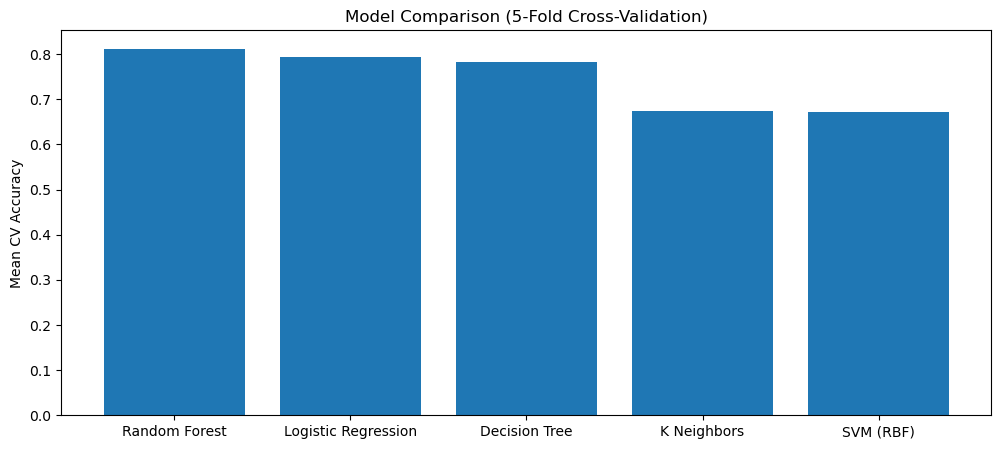

In [22]:
## plotting CV mean accuracy 
plt.figure(figsize=(12, 5))
plt.bar(summary["Model"], summary["Mean Accuracy"])
plt.xticks(rotation=0)
plt.ylabel("Mean CV Accuracy")
plt.title("Model Comparison (5-Fold Cross-Validation)")
plt.show()
